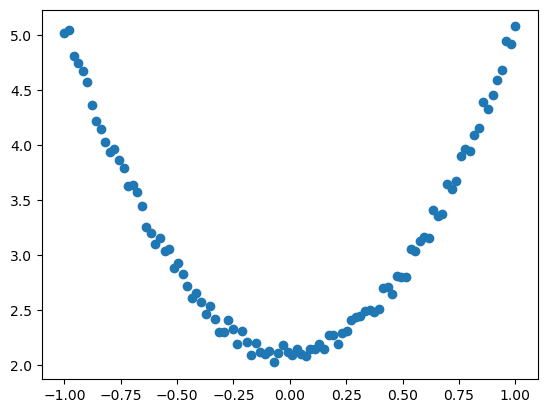

In [1]:
import torch
%matplotlib inline
from matplotlib import pyplot as plt
torch.manual_seed(100)
dtype = torch.float
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = 3*x.pow(2) +2 + 0.2*torch.rand(x.size())
plt.scatter(x.numpy(), y.numpy())

In [6]:
dtype = torch.float32
w = torch.randn(1, 1, dtype=dtype, requires_grad=True)
b = torch.randn(1, 1, dtype=dtype, requires_grad=True) 
lr = 0.001
for epoch in range(1000):
    y_pred = x.pow(2).mm(w) + b
    loss = 0.5 * (y_pred - y).pow(2).sum()
    loss.backward()
    with torch.no_grad():
        w -= lr * w.grad  # 注意：是 w.grad，不是 w.grad()
        b -= lr * b.grad  # 注意：是 b.grad，不是 b.grad()
        w.grad.zero_()
        b.grad.zero_()
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

Epoch 0, Loss: 851.6630859375
Epoch 100, Loss: 6.855515480041504
Epoch 200, Loss: 1.4518864154815674
Epoch 300, Loss: 0.41367989778518677
Epoch 400, Loss: 0.2142086923122406
Epoch 500, Loss: 0.1758837103843689
Epoch 600, Loss: 0.16852034628391266
Epoch 700, Loss: 0.16710563004016876
Epoch 800, Loss: 0.16683372855186462
Epoch 900, Loss: 0.166781485080719


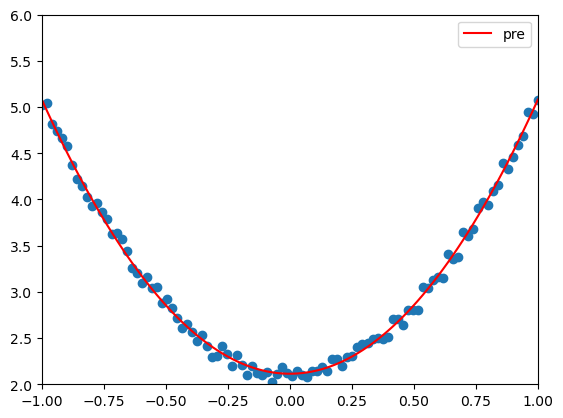

In [12]:
plt.scatter(x.numpy(), y.numpy())
plt.plot(x.numpy(), y_pred.detach().numpy(), 'r-', label='pre')
plt.xlim(-1, 1)
plt.ylim(2, 6)
plt.legend()